1. Product_Category_2, Product_Category_3의 NA 값을 0값으로 대체하고 Product_Category_1,2,3 변수의 값을 다 더한 Product_all 변수를 생성하여 추가하라. 

User_id를 character 변수로, Occupation, Marital_Status, Product_Category_1,2,3 변수를 범주형 변수로 변환하시오. 

범주형 변수인 Gender, Age, City_Category, Stay_In_Current_City_Years를 더미변수로 변환해 BlackFriday 데이터에 추가하시오.

In [33]:
import pandas as pd
import numpy as np

data = pd.read_csv("BlackFriday.csv")
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [34]:
#NA 값 0으로 대체
data['Product_Category_2'].fillna(0,inplace=True)
data['Product_Category_3'].fillna(0,inplace=True)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [35]:
data['Product_all'] = data['Product_Category_1'] + data['Product_Category_2'] +data['Product_Category_3']
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_all
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,3.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,21.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,12.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,26.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,8.0


In [36]:
#변수 데이터타입 변환
data = data.astype({'User_ID':'str','Occupation':'category',
             'Marital_Status':'category','Product_Category_1':'category',
             'Product_Category_2':'category','Product_Category_3':'category'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     537577 non-null  object  
 1   Product_ID                  537577 non-null  object  
 2   Gender                      537577 non-null  object  
 3   Age                         537577 non-null  object  
 4   Occupation                  537577 non-null  category
 5   City_Category               537577 non-null  object  
 6   Stay_In_Current_City_Years  537577 non-null  object  
 7   Marital_Status              537577 non-null  category
 8   Product_Category_1          537577 non-null  category
 9   Product_Category_2          537577 non-null  category
 10  Product_Category_3          537577 non-null  category
 11  Purchase                    537577 non-null  int64   
 12  Product_all                 537577 non-null  float64 
dtyp

In [37]:
#더미 변수 변환
data2 = data[['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']]
data = pd.get_dummies(data,columns = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'])
data = pd.concat([data,data2],axis=1,sort=False)

data.head()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_all,Gender_F,...,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Gender,Age,City_Category,Stay_In_Current_City_Years
0,1000001,P00069042,10,0,3,0.0,0.0,8370,3.0,1,...,0,0,0,1,0,0,F,0-17,A,2
1,1000001,P00248942,10,0,1,6.0,14.0,15200,21.0,1,...,0,0,0,1,0,0,F,0-17,A,2
2,1000001,P00087842,10,0,12,0.0,0.0,1422,12.0,1,...,0,0,0,1,0,0,F,0-17,A,2
3,1000001,P00085442,10,0,12,14.0,0.0,1057,26.0,1,...,0,0,0,1,0,0,F,0-17,A,2
4,1000002,P00285442,16,0,8,0.0,0.0,7969,8.0,0,...,1,0,0,0,0,1,M,55+,C,4+


2. 전처리가 완료된 데이터에서 User_ID, Product_ID, Gender, Age, City_Category,Stay_In_Current_City_Years, Product_all 변수를 제외한 나머지 변수들을 활용하여 kmeans 군집 분석을 수행하고 해석하시오. (범주형 변수는 수치형으로 변환)
그리고 최적의 군집 개수를 찾아 만일 군집 개수가 이전 결과와 다르면 분석을 다시 수행하여 해석하시오.

In [38]:
X = data[['Occupation','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']]
y = data[['Purchase']]

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

features = ['Occupation','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']

for feature in features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])
    
X.head()

<ipython-input-39-1ce61e6ae420>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = le.fit_transform(X[feature])


,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,10,0,2,0,0
1,10,0,0,5,11
2,10,0,11,0,0
3,10,0,11,13,0
4,16,0,7,0,0


In [40]:
#Elbow Method

interia_arr = []
k_range = range(2,15)

for k in k_range:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    interia = kmeans.inertia_
    
    print('k : ',k, 'inertia : ',interia)
    interia_arr.append(interia)
    
interia_arr = np.array(interia_arr)

k :  2 inertia :  43984286.76453577
k :  3 inertia :  34082118.26087614
k :  4 inertia :  25645553.304693937
k :  5 inertia :  20961883.040220663
k :  6 inertia :  17125064.984320328
k :  7 inertia :  15183466.803560108
k :  8 inertia :  13932678.132965432
k :  9 inertia :  12759234.297719294
k :  10 inertia :  12031150.77076024
k :  11 inertia :  11432001.82676768
k :  12 inertia :  10569319.006773125
k :  13 inertia :  9923788.746362194
k :  14 inertia :  9207193.217827536


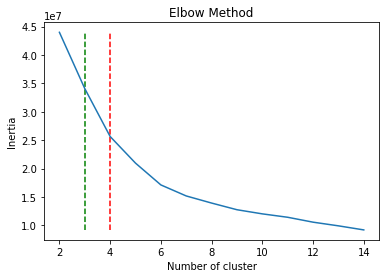

In [41]:
##시각화
plt.plot(k_range,interia_arr)
plt.vlines(3,ymin = interia_arr.min()*0.9999, ymax = interia_arr.max()*1.0003,linestyles = '--',color = 'g')
plt.vlines(4,ymin = interia_arr.min()*0.9999, ymax = interia_arr.max()*1.0003,linestyles = '--',color = 'r')


plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

3. 최적의 군집 개수를 찾아 재수행한 군집분석의 결과로 분류된 군집번호를 원본 데이터의 각 행에 맞게 labelling 하여 clust라는 변수로 저장하고, cluster별 특성을 파악하여 설명하시오.

In [42]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter=300)
kmeans.fit(X)

KMeans(n_clusters=3)

In [43]:
data['clust'] = kmeans.labels_

In [47]:
data.groupby(['Age'])['clust'].count()

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
Name: clust, dtype: int64

In [48]:
data.groupby(['clust'])['Purchase'].mean()

clust
0    9165.224163
1    9540.884371
2    9308.156830
Name: Purchase, dtype: float64